In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib as mpl
import ast

### Import and Clean Data

In [ ]:
# Import hyperparamteter optimization results
file = "model training/optuna_results.csv"
df = pd.read_csv(file)

In [5]:
# Sort by highest MSE
sorted_df = df.sort_values(by='mse', ascending=False).reset_index(drop=True)

# Convert stringified dicts in params column 
df["params"] = df["params"].apply(ast.literal_eval)
params_df = df["params"].apply(pd.Series)
df = pd.concat([df.drop(columns=["params"]), params_df], axis=1)
df = df.drop(df.nlargest(9, 'mse').index)

### Optimizer

/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


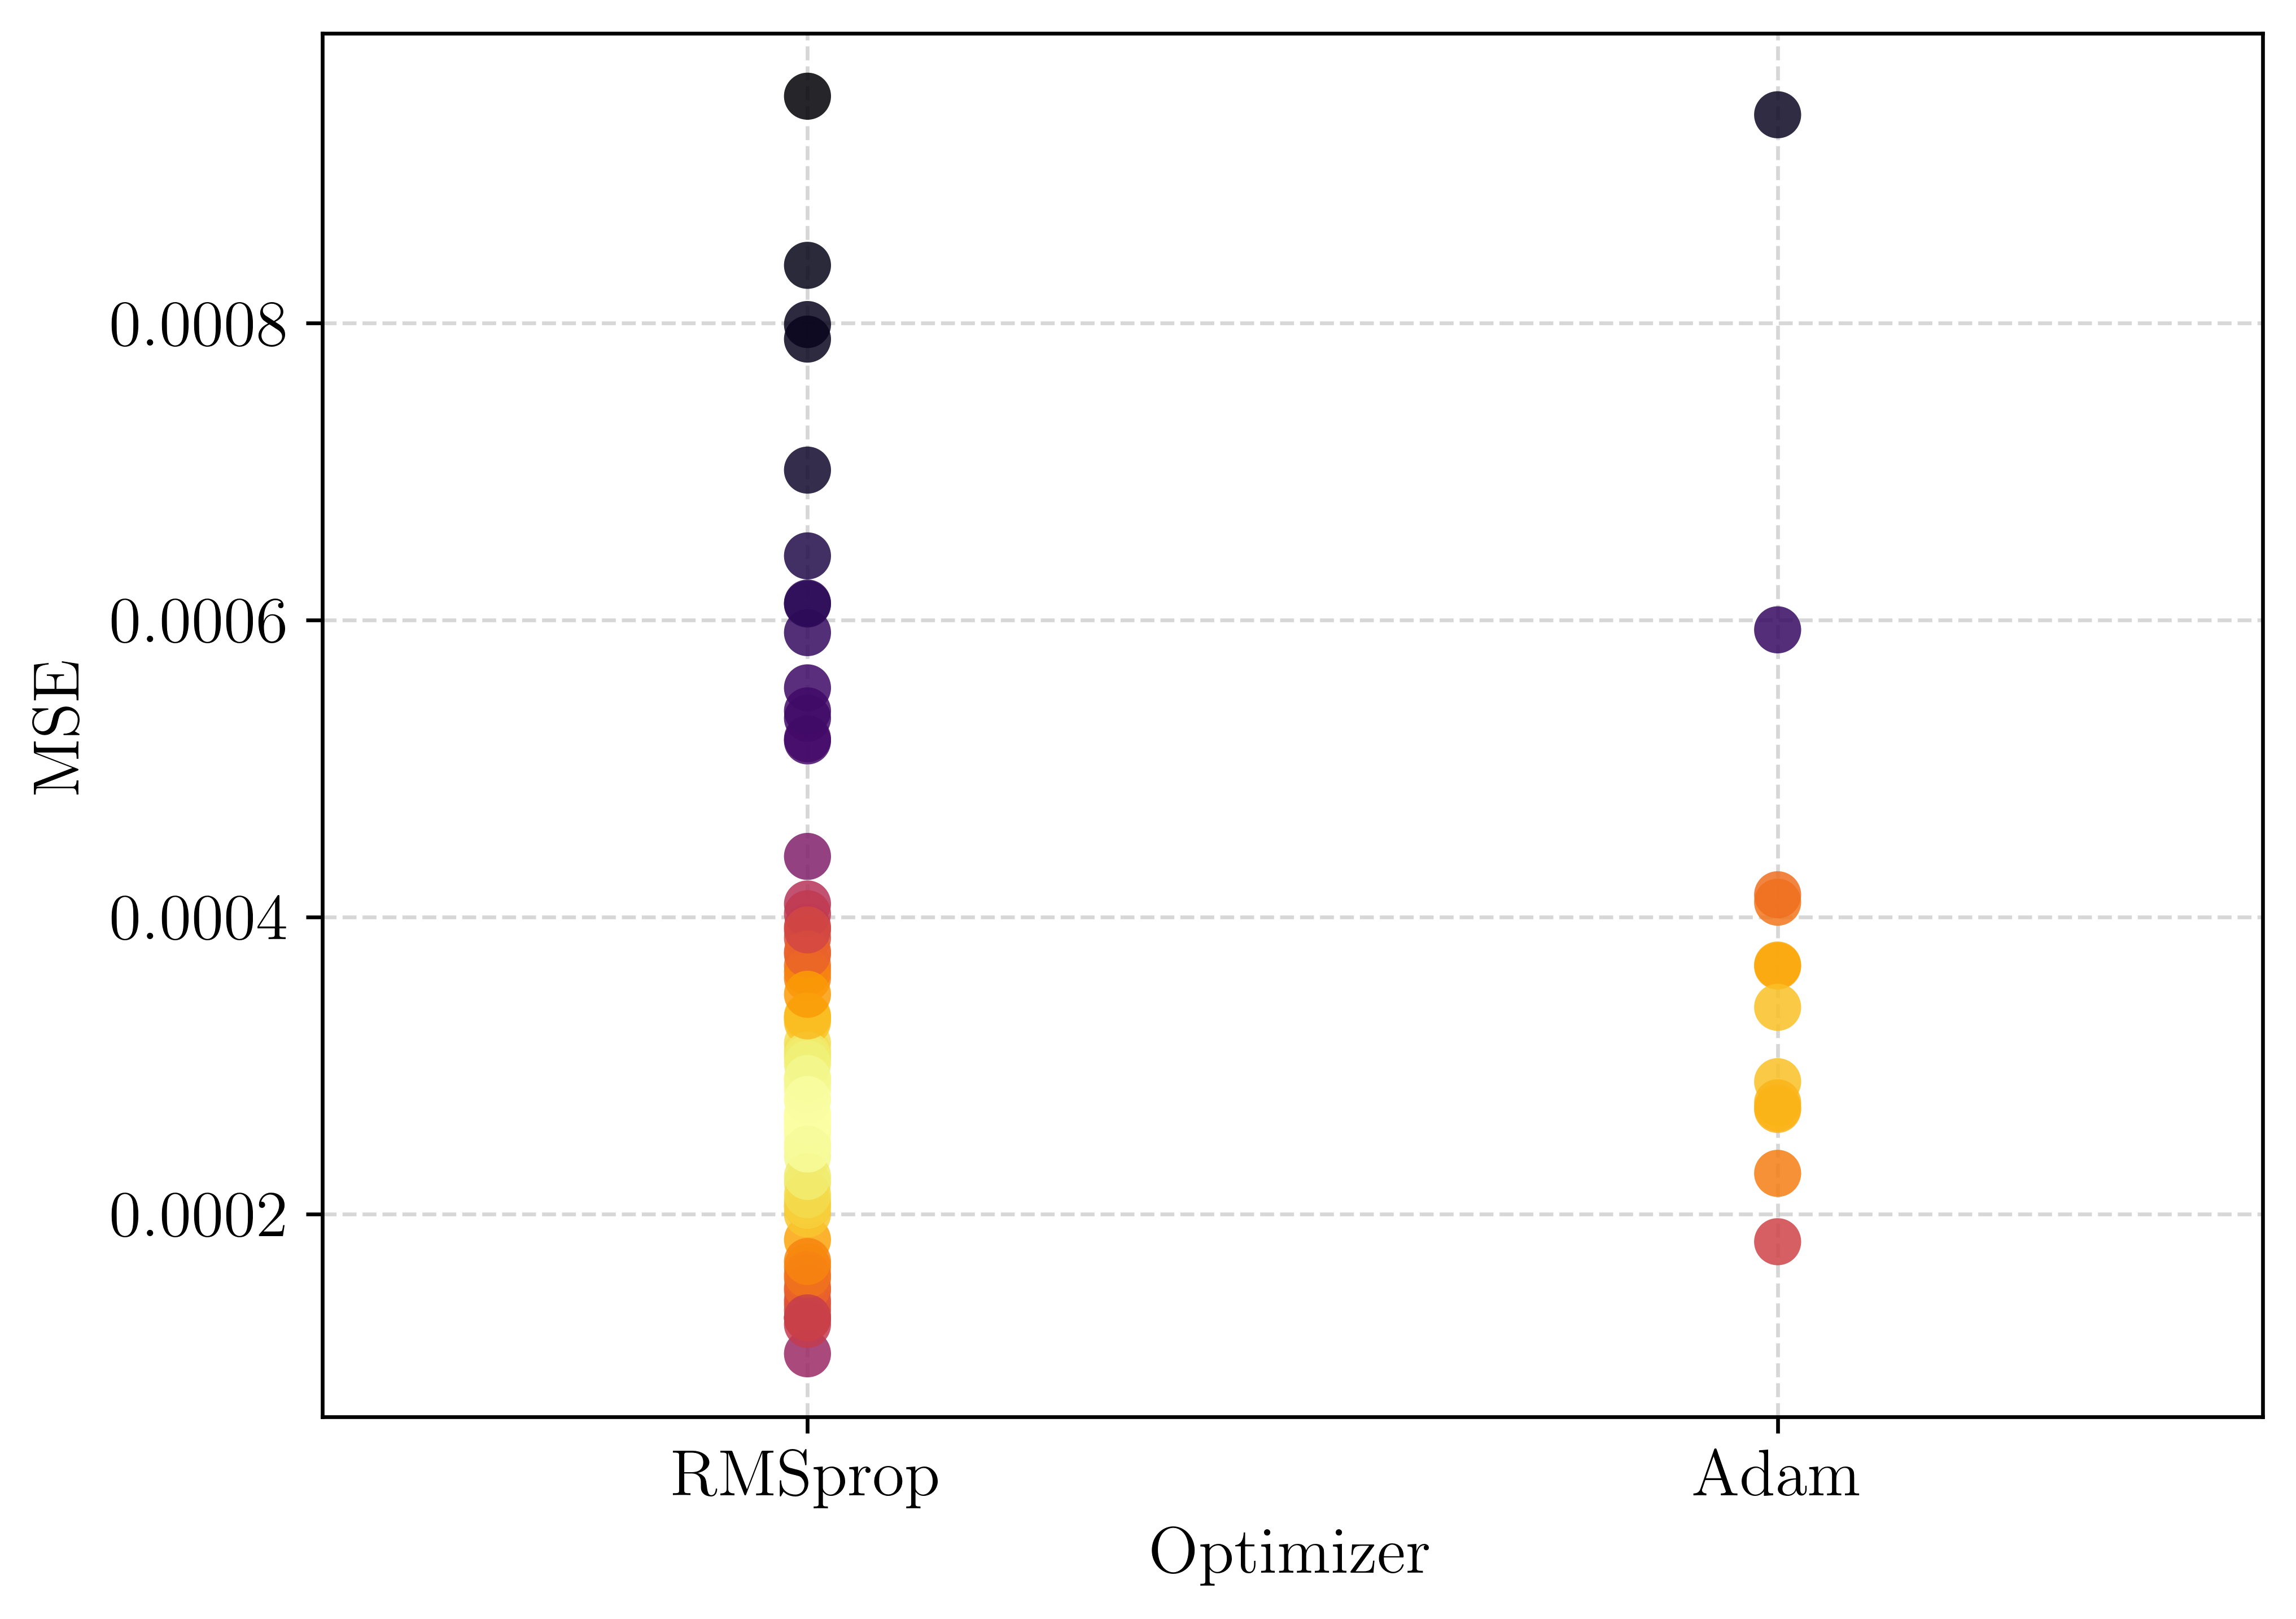

In [6]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold', 
    'axes.labelsize': 14,
    'axes.labelweight': 'bold', 
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

df['density'] = 0.0
for opt in df['optimizer'].unique():
    group = df[df['optimizer'] == opt]
    kde = gaussian_kde(group['mse'])
    df.loc[group.index, 'density'] = kde(group['mse'])

plt.figure(figsize=(7, 5), dpi=600)
sns.stripplot(
    data=df,
    x='optimizer',
    y='mse',
    hue='density',
    palette='inferno',
    size=10,
    jitter=0.0,
    alpha=0.85,
    edgecolor=None
)

plt.xlabel("Optimizer", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend([],[], frameon=False) 
plt.show()

### Layers

/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


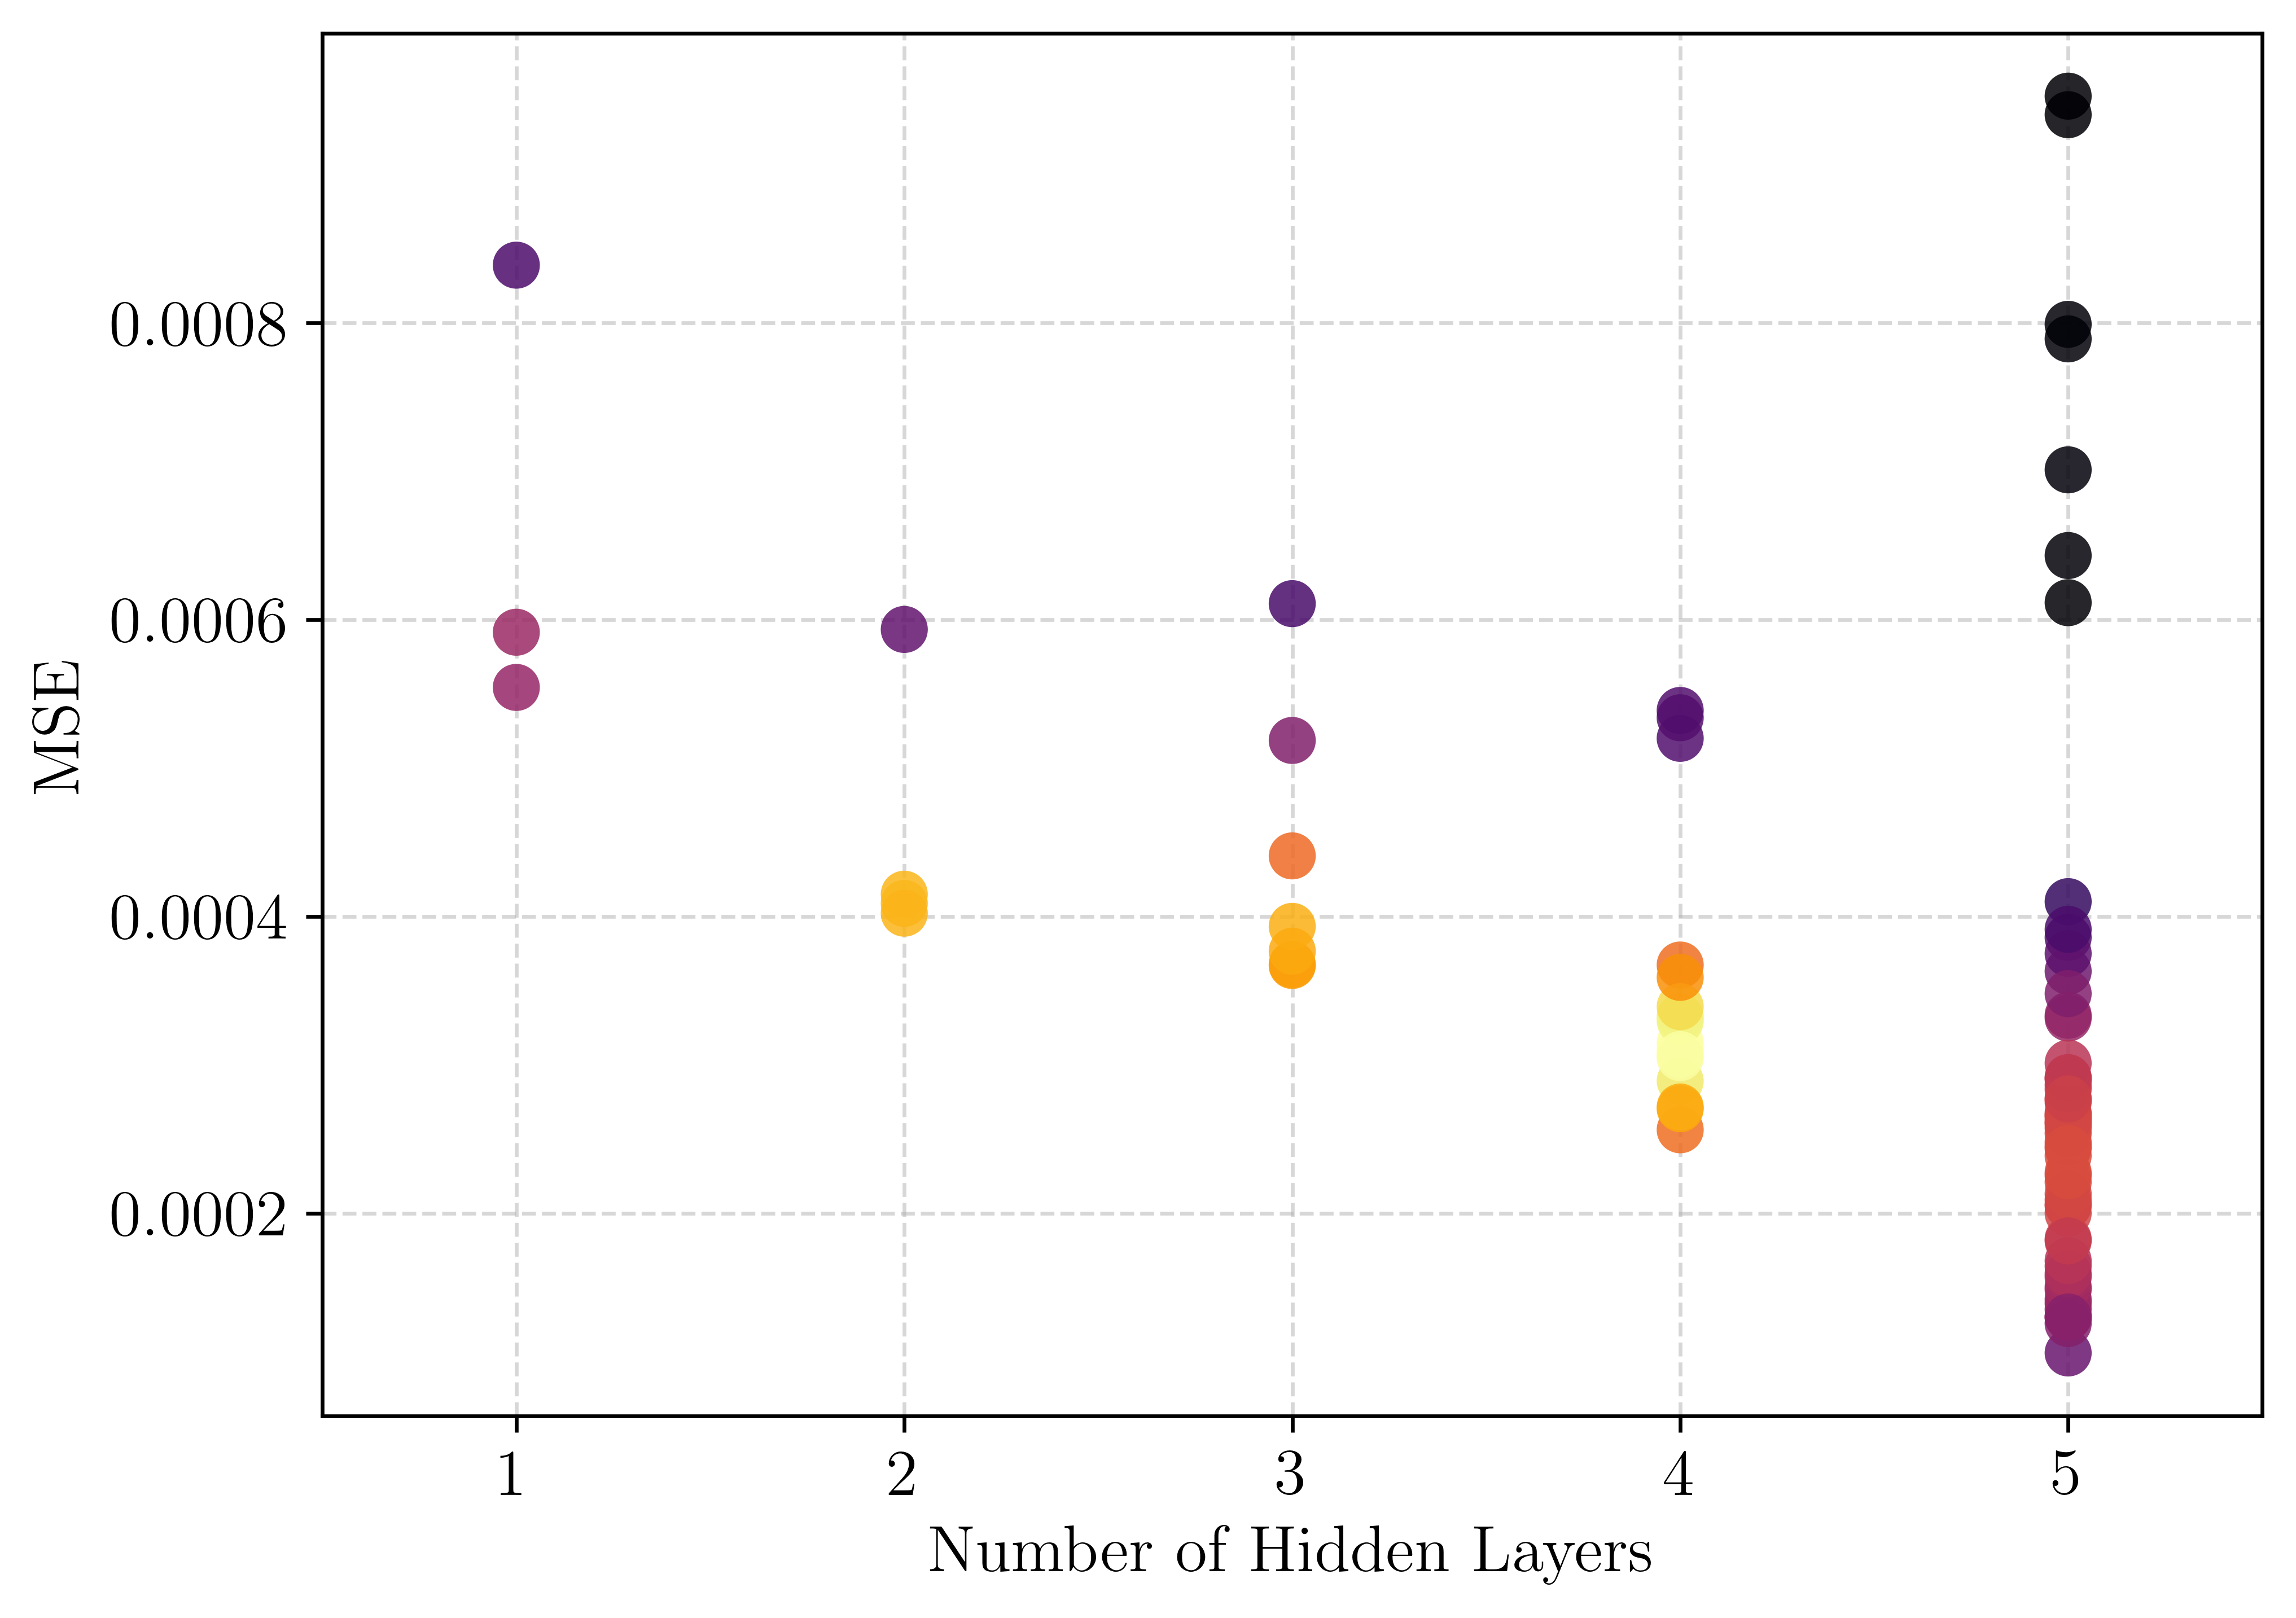

In [7]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold', 
    'axes.labelsize': 14,
    'axes.labelweight': 'bold', 
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

df['density'] = 0.0
for d in df['depth'].unique():
    group = df[df['depth'] == d]
    kde = gaussian_kde(group['mse'])
    df.loc[group.index, 'density'] = kde(group['mse'])

plt.figure(figsize=(7, 5), dpi=600)
sns.stripplot(
    data=df,
    x='depth',
    y='mse',
    hue='density',
    palette='inferno',
    size=10,
    jitter=0.0,
    alpha=0.85,
    edgecolor=None
)

plt.xlabel("Number of Hidden Layers")
plt.ylabel("MSE")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend([], [], frameon=False)  # remove legend
plt.show()

### Batch Size

/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentklaer/Documents/Thesis/final code/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


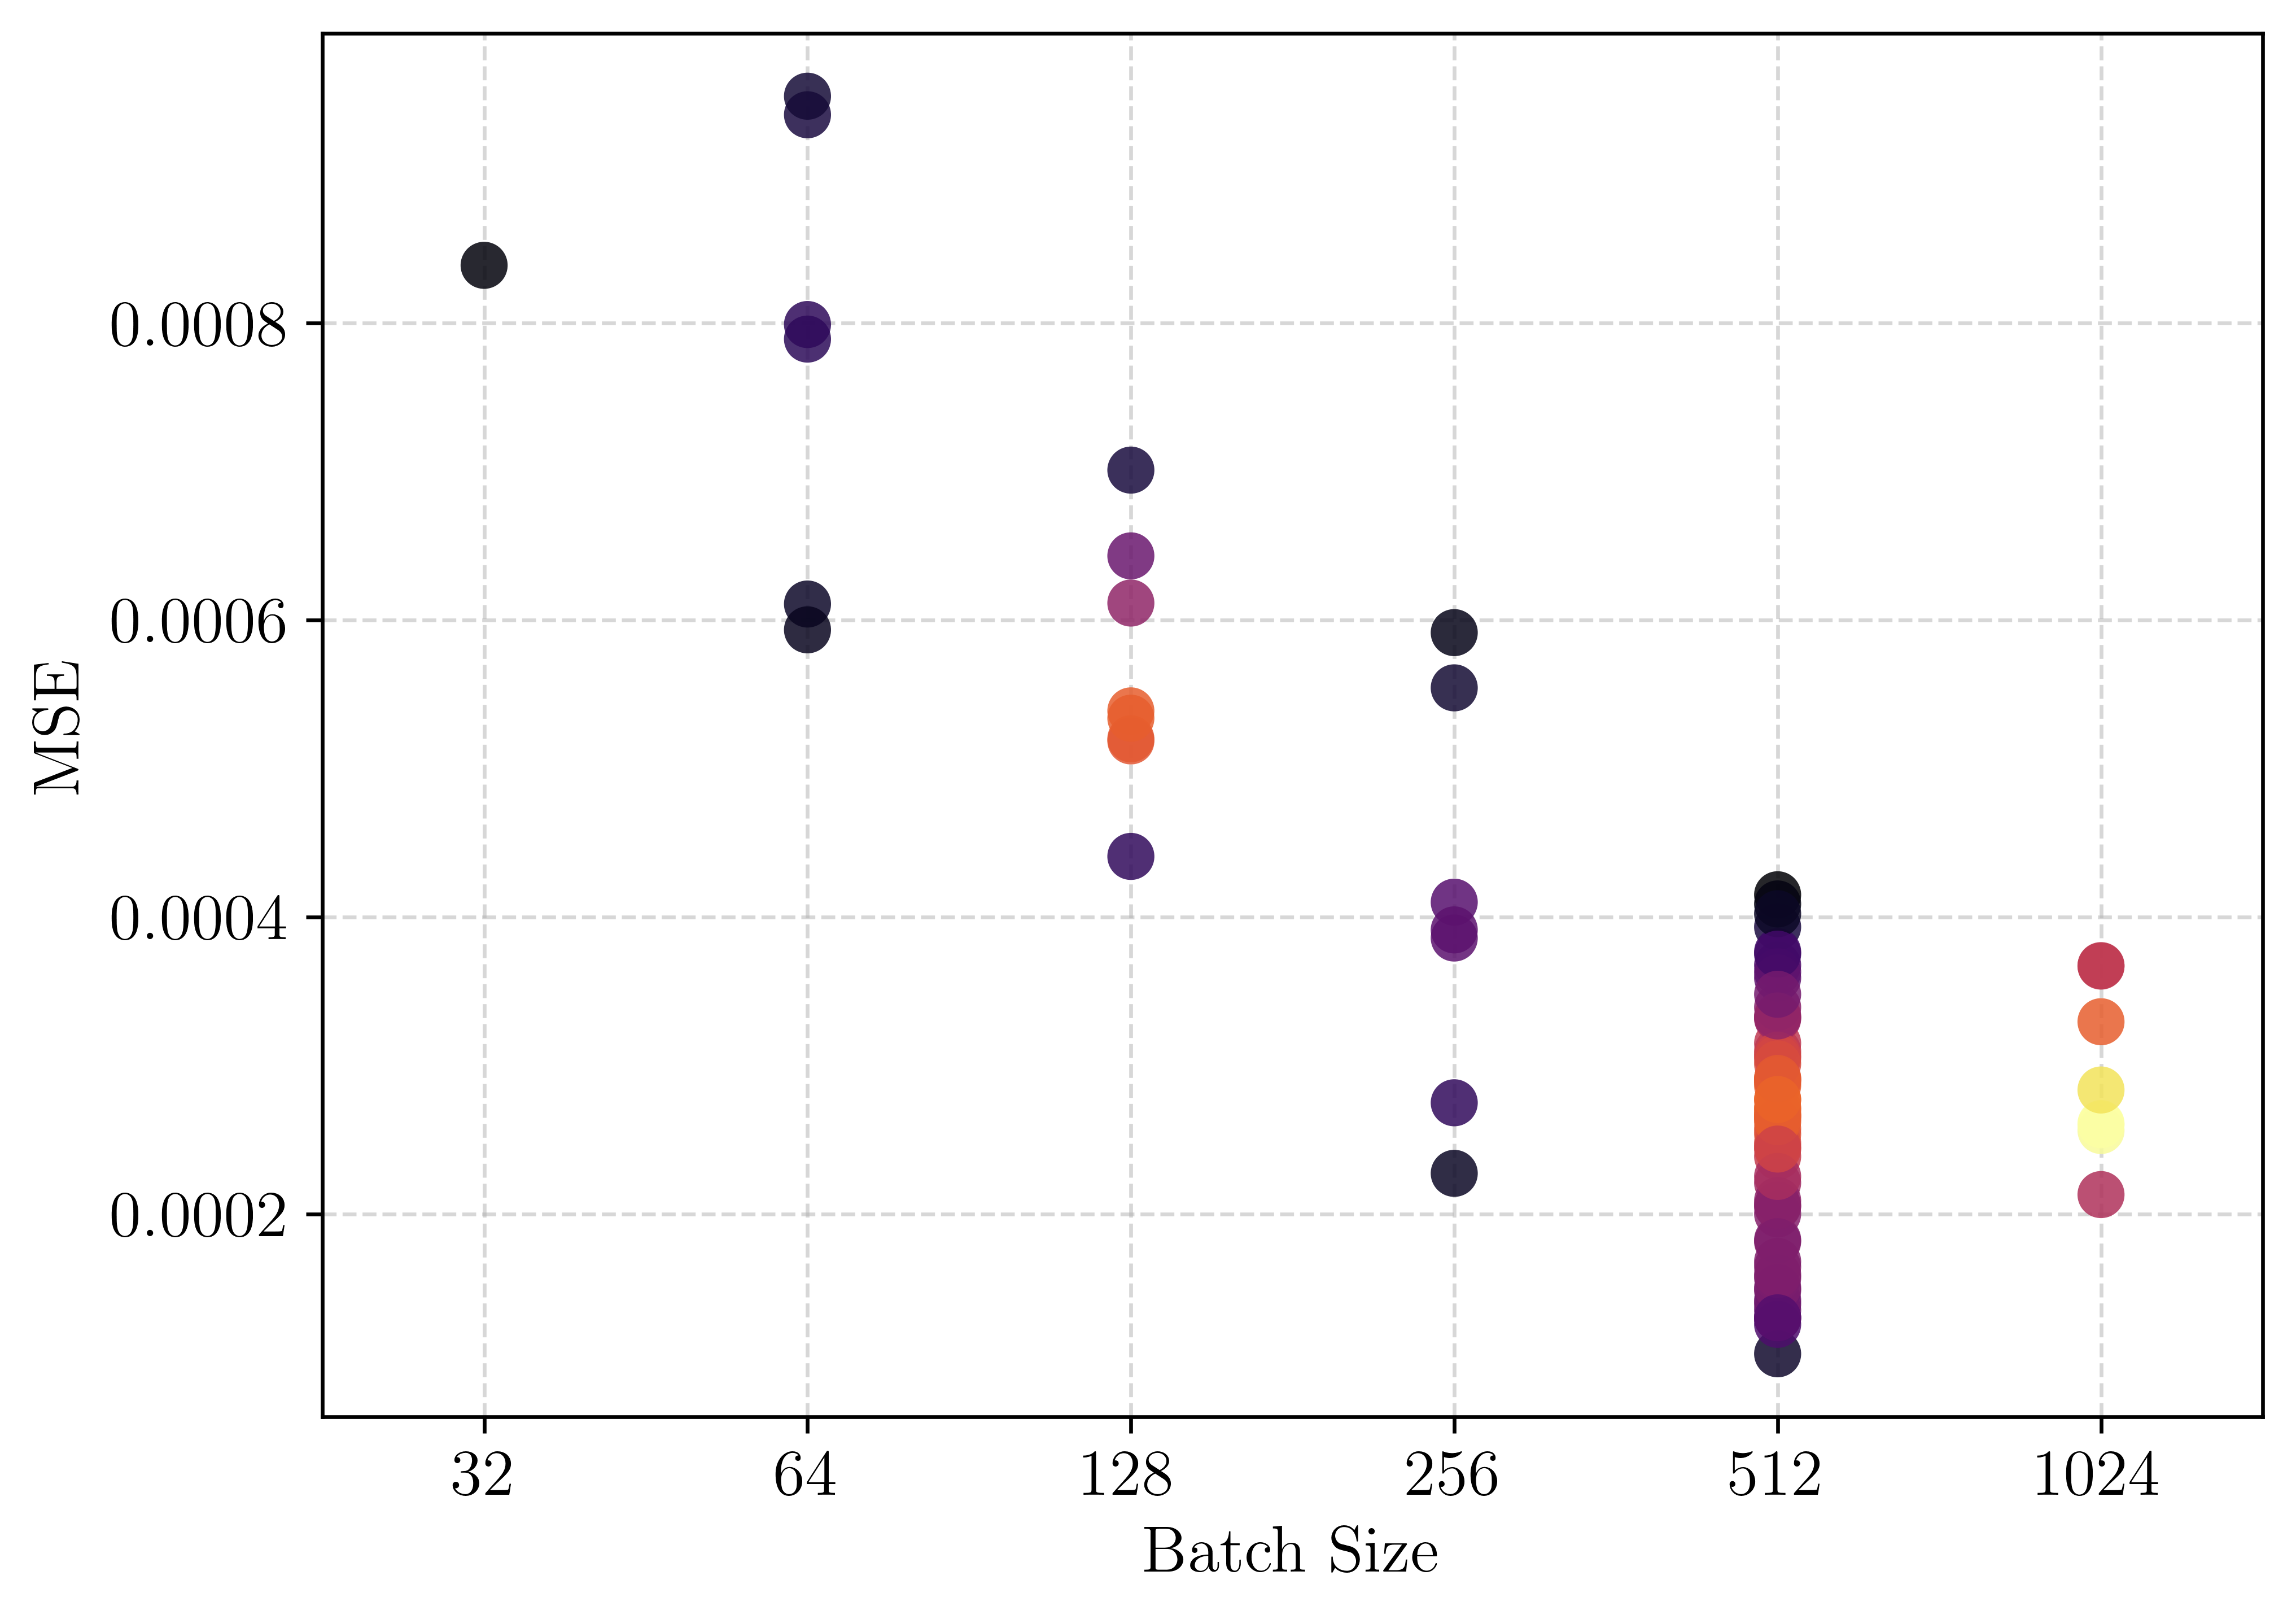

In [8]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold', 
    'axes.labelsize': 14,
    'axes.labelweight': 'bold', 
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

from scipy.stats import gaussian_kde
import numpy as np

for b in df['batch_size'].unique():
    group = df[df['batch_size'] == b]
    
    if len(group) < 2:
        continue
    
    kde = gaussian_kde(group['mse'])
    df.loc[group.index, 'density'] = kde(group['mse'])

plt.figure(figsize=(7, 5), dpi=600)
sns.stripplot(
    data=df,
    x='batch_size',
    y='mse',
    hue='density',
    palette='inferno',
    size=10,
    jitter=0.0,
    alpha=0.85,
    edgecolor=None
)

plt.xlabel("Batch Size", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend([], [], frameon=False)  # remove legend
plt.show()

### Depth and Width

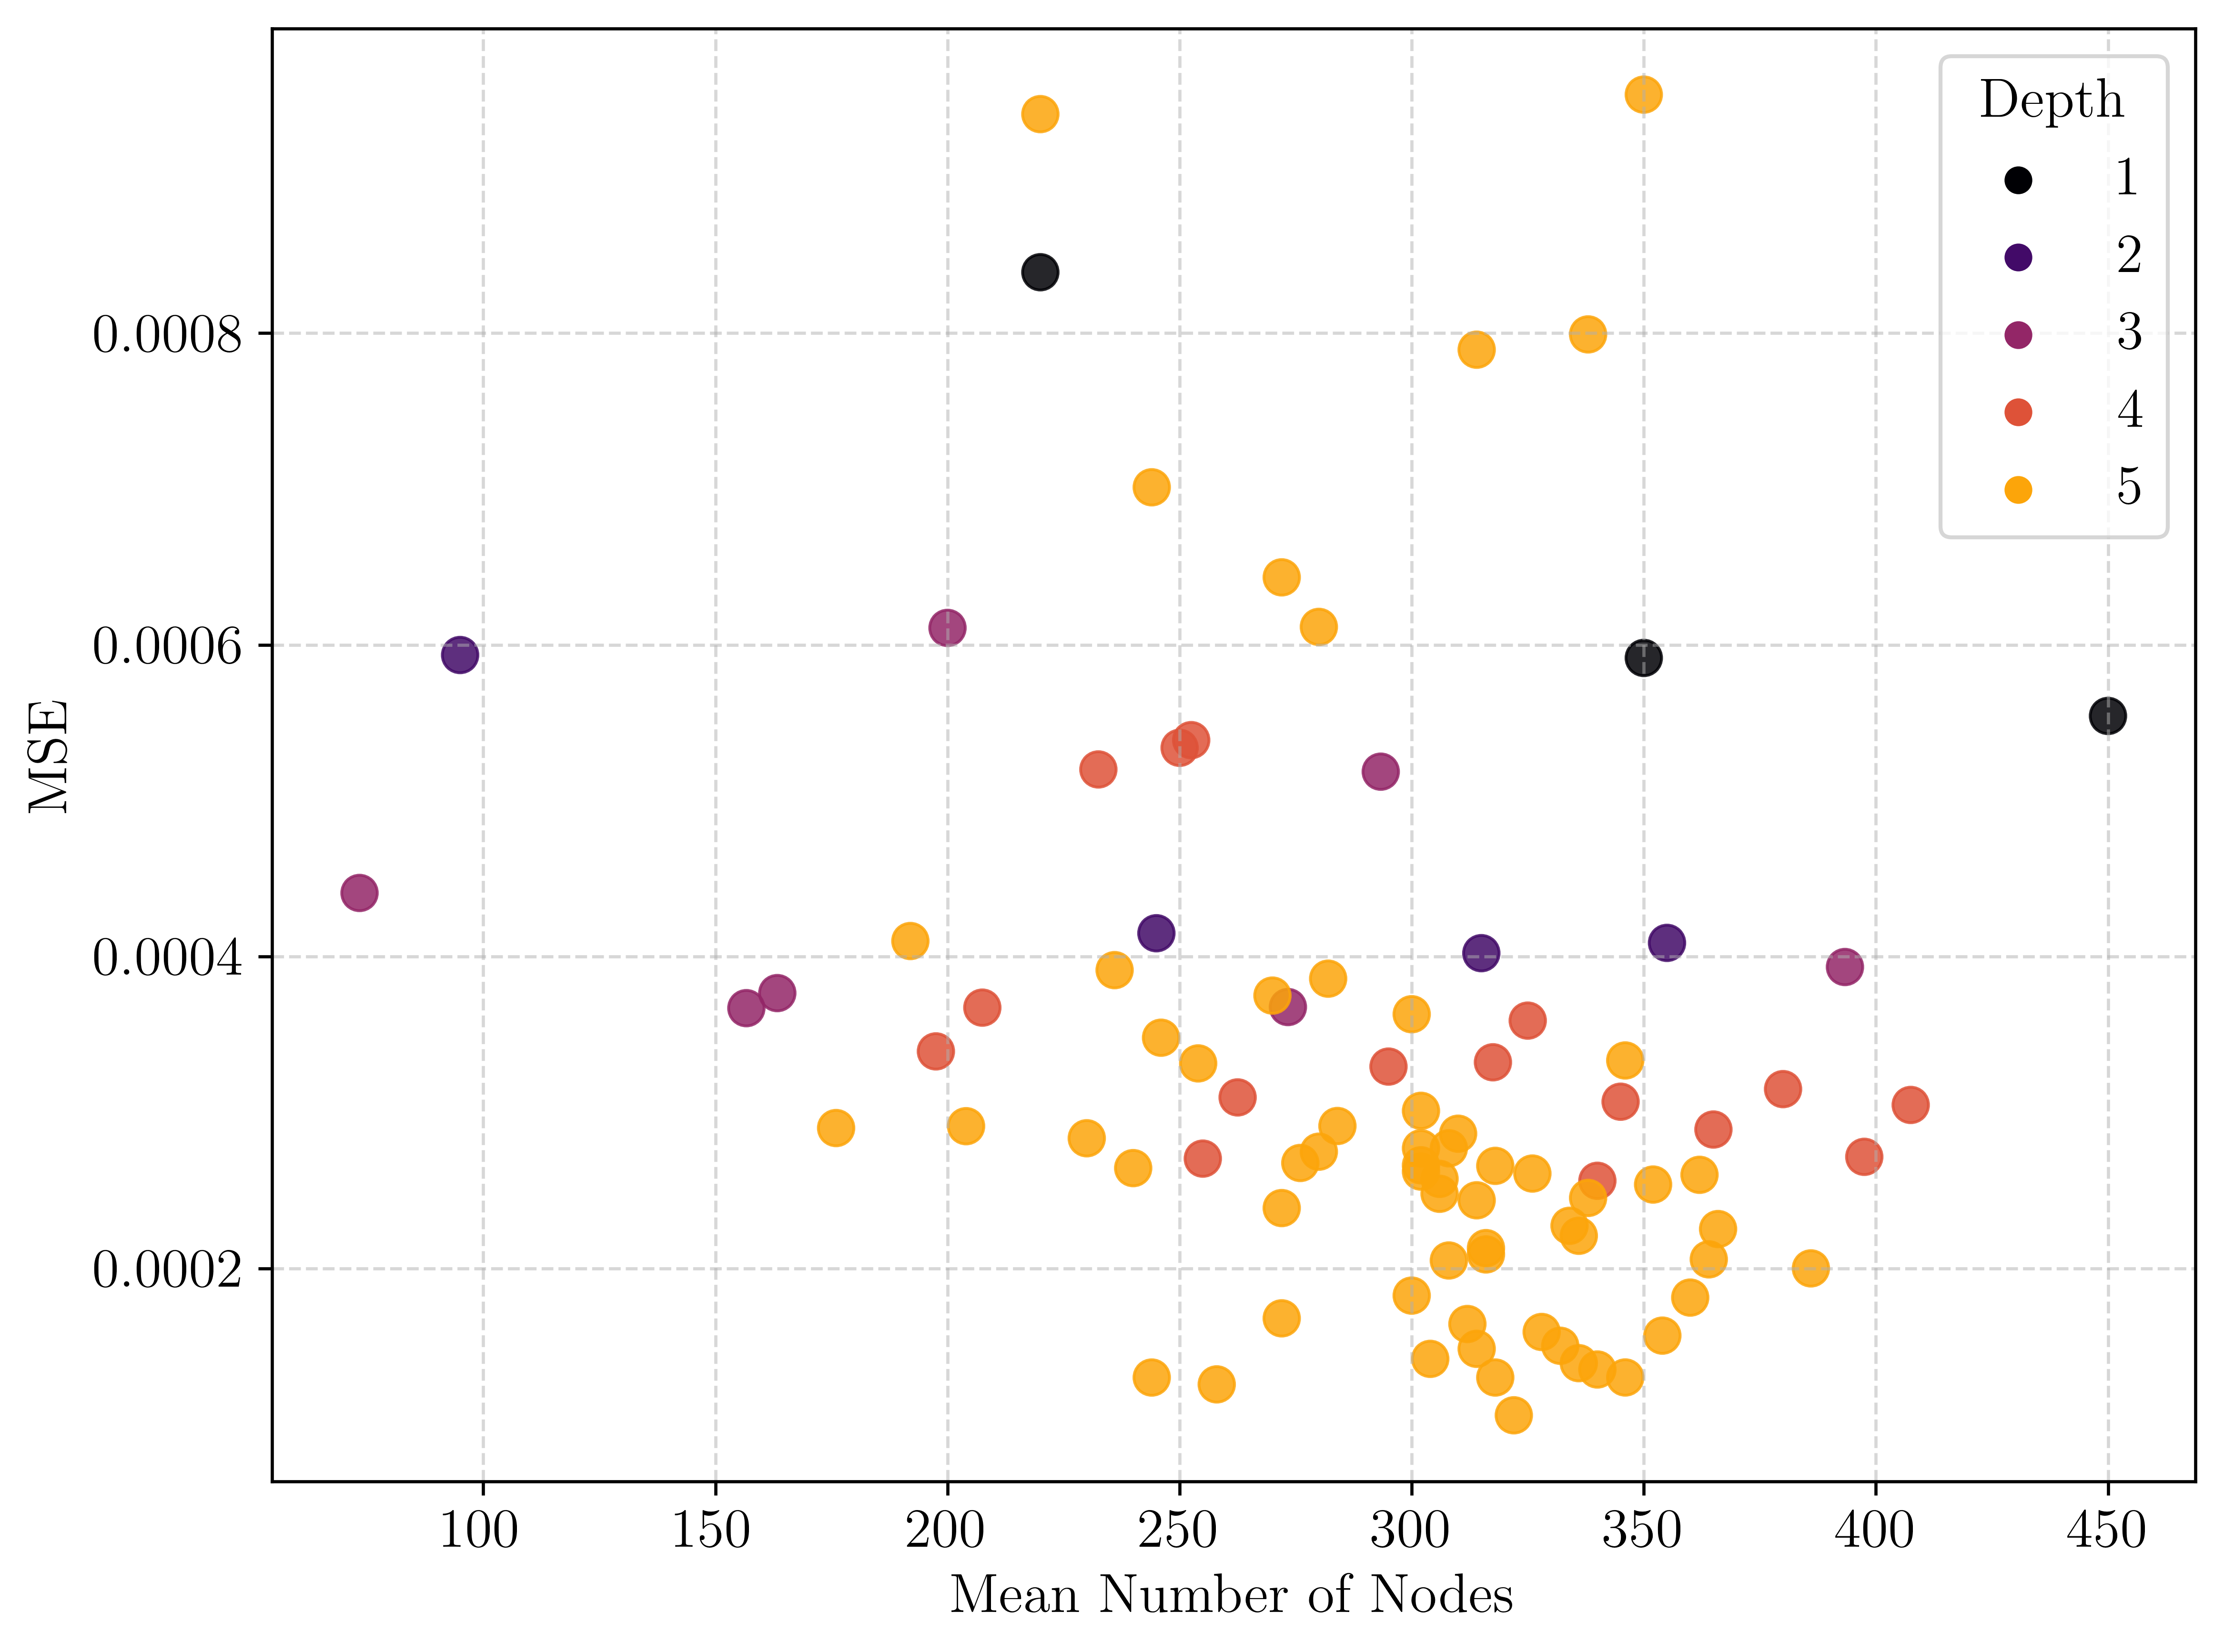

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

base_cmap = plt.cm.inferno
truncated_cmap = ListedColormap(base_cmap(np.linspace(0, 0.8, 256)))

width_cols = [col for col in df.columns if col.startswith("width_layer_")]
df["mean_width"] = df[width_cols].mean(axis=1, skipna=True)

plt.figure(figsize=(8, 6), dpi=600)
sns.scatterplot(
    data=df,
    x="mean_width",
    y="mse",
    hue="depth",
    palette=truncated_cmap,
    s=80,
    alpha=0.85,
    edgecolor=None
)

plt.legend(title="Depth", title_fontsize=14, fontsize=14)

plt.xlabel("Mean Number of Nodes", fontsize=14, fontweight='bold')
plt.ylabel("MSE", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()